In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PolylineIntersection as poly
from functools import reduce
import cmath

In [15]:
E = 195000
sig_y = 181
H = 1930
nu = 0.3

In [16]:
def computePQ(sig, tau):
    p = sig/3.0
    q = np.sqrt(sig*sig + 3 * tau*tau)
    return p, q

In [17]:
def computeST(p, q):
    sig = 3.0 * p
    tau = np.sqrt((q * q - 9 * p * p)/3)
    #print(sig, np.sqrt((q * q - 9 * p * p)/3))
    return sig, tau

In [18]:
p_Y, q_Y = computePQ(sig_y, 0)
p_A, q_A = computePQ(151.2, 93.1)
p_B, q_B = computePQ(257.2, 33.1)
p_y = [-100, 300]
q_y = [sig_y, sig_y]

In [19]:
sig_A = 151.2
tau_A = 93.1
sig_B = 257.2
tau_B = 33.1

In [20]:
sig_OA = np.linspace(0, sig_A, num=1000)
tau_OA = np.linspace(0, tau_A, num=1000)
sig_AB = np.linspace(sig_A, sig_B, num=1000)
tau_AB = np.linspace(tau_A, tau_B, num=1000)
sig_BO = np.linspace(sig_B, 0, num=1000)
tau_BO = np.linspace(tau_B, 0, num=1000)

In [21]:
def computePQs(sigs, taus):
    ps = []
    qs = []
    for sig, tau in zip(sigs, taus):
        p, q = computePQ(sig, tau)
        ps.append(p)
        qs.append(q)

    return ps, qs 

In [22]:
def computeSTs(ps, qs):
    sigmas = []
    taus = []
    for p, q in zip(ps, qs):
        sig, tau = computeST(p, q)
        sigmas.append(sig)
        taus.append(tau)

    return sigmas, taus

In [23]:
p_OA, q_OA = computePQs(sig_OA, tau_OA)
p_AB, q_AB = computePQs(sig_AB, tau_AB)
p_BO, q_BO = computePQs(sig_BO, tau_BO)

In [24]:
min_q_AB = min(q_AB)
min_index = q_AB.index(min_q_AB)
p_B0 = p_AB[min_index]
q_B0 = q_AB[min_index]
sig_B0, tau_B0 = computeST(p_B0, q_B0)
print(min_index, min_q_AB, sig_B0, tau_B0)

33 220.99781489737546 154.7015015015015 91.11801801801799


In [25]:
pq_A_poly = ((0, q_A), (100, q_A))
pq_AB_poly = list(zip(p_AB[min_index:-1], q_AB[min_index:-1]))
[flag, pt, index] = poly.poly_intersection(pq_A_poly, pq_AB_poly)
p_B0 = pt[0]
q_B0 = pt[1]
sig_B0, tau_B0 = computeST(p_B0, q_B0)
print(p_B0, q_B0, sig_B0, tau_B0)

(52.74348093414609, 221.05264078947346, 0.5274348093414609, 0.2586071663758299)
52.74348093414609 221.05264078947346 158.2304428024383 89.12051198712952


In [26]:
t = sig_y/q_A
p_Y = t * p_A
q_Y = sig_y
sig_Y, tau_Y = computeST(p_Y, q_Y)
print(min_index, min_q_AB, sig_Y, tau_Y)

33 220.99781489737546 123.80399484150036 76.23116349036825


In [27]:
p_ys = np.linspace(0, 60, num=1000)
q_ys = [sig_y]*1000
sig_ys, tau_ys = computeSTs(p_ys, q_ys)

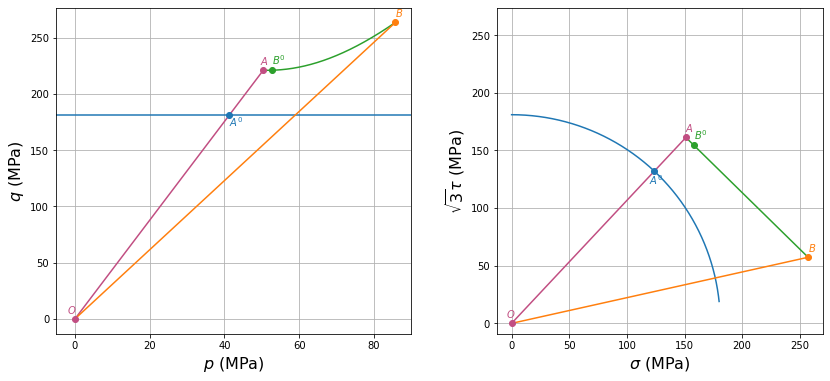

In [28]:
# Plot the data
fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(121)
plt.plot(np.array(p_y), np.array(q_y), 'C0-')
plt.plot(np.array(p_OA), np.array(q_OA), '-', color="#c14e82")
plt.plot(np.array(p_AB), np.array(q_AB), 'C2-')
plt.plot(np.array(p_BO), np.array(q_BO), 'C1-')
plt.plot(np.array(p_B0), np.array(q_B0), 'C2o')
plt.plot(0, 0, 'o', color="#c14e82")
plt.plot(p_A, q_A, 'o', color="#c14e82")
plt.plot(p_B, q_B, 'o', color="C1")
plt.plot(p_Y, q_Y, 'o', color="C0")
plt.text(p_A-1, q_A+5, '$A$', color="#c14e82")
plt.text(p_B0, q_B0+5, '$B^0$', color="C2")
plt.text(p_B, q_B+5, '$B$', color="C1")
plt.text(p_Y, q_Y-10, '$A^0$', color="C0")
plt.text(-2, 5, '$O$', color="#c14e82")
plt.xlabel('$p$ (MPa)', fontsize=16)
plt.ylabel('$q$ (MPa)', fontsize=16)
plt.grid(True)
ax.set_xlim([-5, 90])

ax = fig.add_subplot(122)
s3 = np.sqrt(3)
plt.plot(np.array(sig_ys), np.array(tau_ys)*s3, 'C0-')
plt.plot(np.array(sig_OA), np.array(tau_OA)*s3, '-', color="#c14e82")
plt.plot(np.array(sig_AB), np.array(tau_AB)*s3, 'C2-')
plt.plot(np.array(sig_BO), np.array(tau_BO)*s3, 'C1-')
plt.plot(np.array(sig_B0), np.array(tau_B0)*s3, 'C2o')
plt.plot(0, 0, 'o', color="#c14e82")
plt.plot(sig_A, tau_A*s3, 'o', color="#c14e82")
plt.plot(sig_B, tau_B*s3, 'o', color="C1")
plt.plot(sig_Y, tau_Y*s3, 'o', color="C0")
plt.text(sig_A-1, tau_A*s3+5, '$A$', color="#c14e82")
plt.text(sig_B0, tau_B0*s3+5, '$B^0$', color="C2")
plt.text(sig_B, tau_B*s3+5, '$B$', color="C1")
plt.text(sig_Y-5, tau_Y*s3-12, '$A^0$', color="C0")
plt.text(-5, 5, '$O$', color="#c14e82")
#ax.set_aspect('equal')
plt.axis('square')
plt.xlabel('$\sigma$ (MPa)', fontsize=16)
plt.ylabel('$\sqrt{3}\\tau$ (MPa)', fontsize=16)
plt.grid(True)
#ax.set_xlim([-5, 90])
#ax.set_ylim([0, 20])
#ax.legend(loc='best', fontsize=10)
#fig.savefig('fig2_v6.03.015.svg')

In [29]:
E = 195000.0
nu = 0.3
sig_y = 181
ET = 1930.0
G = E/(2*(1+nu))
eps_eq = (1/ET - 1/E)
H = 1/eps_eq
print(G,H)

75000.0 1949.2930025379396


In [30]:
def stress(sig, tau):
    sig = np.array([[sig, tau, 0],[tau, 0, 0],[0, 0, 0]])
    return sig
    
sigma_A = stress(sig_A, tau_A)
sigma_B = stress(sig_B, tau_B)
sigma_B0 = stress(sig_B0, tau_B0)
print(sigma_A, sigma_B, sigma_B0, sep='\n')

[[151.2  93.1   0. ]
 [ 93.1   0.    0. ]
 [  0.    0.    0. ]]
[[257.2  33.1   0. ]
 [ 33.1   0.    0. ]
 [  0.    0.    0. ]]
[[158.2304428   89.12051199   0.        ]
 [ 89.12051199   0.           0.        ]
 [  0.           0.           0.        ]]


In [31]:
def stress_m(sig):
    p = 1/3 * sig.trace();
    sig_m = np.array([[p, 0, 0], [0, p, 0], [0, 0, p]])
    return sig_m

p_A = stress_m(sigma_A)
p_B = stress_m(sigma_B)
p_B0 = stress_m(sigma_B0)
print(p_A, p_B, p_B0, sep='\n')

[[50.4  0.   0. ]
 [ 0.  50.4  0. ]
 [ 0.   0.  50.4]]
[[85.73333333  0.          0.        ]
 [ 0.         85.73333333  0.        ]
 [ 0.          0.         85.73333333]]
[[52.74348093  0.          0.        ]
 [ 0.         52.74348093  0.        ]
 [ 0.          0.         52.74348093]]


In [32]:
def stress_dev(sig):
    p = stress_m(sig)
    sig_d = sig - p
    return sig_d

s_A = stress_dev(sigma_A)
s_B = stress_dev(sigma_B)
s_B0 = stress_dev(sigma_B0)
print(s_A, s_B, s_B0, sep='\n')

[[100.8  93.1   0. ]
 [ 93.1 -50.4   0. ]
 [  0.    0.  -50.4]]
[[171.46666667  33.1          0.        ]
 [ 33.1        -85.73333333   0.        ]
 [  0.           0.         -85.73333333]]
[[105.48696187  89.12051199   0.        ]
 [ 89.12051199 -52.74348093   0.        ]
 [  0.           0.         -52.74348093]]


In [33]:
def J2(sig):
    s = stress_dev(sig)
    ss = np.array(list(map(lambda x : x*x, s)))
    J2_val = reduce((lambda x, y: x + y), ss.reshape(9,1))
    return J2_val[0]/2
    
J2_A = J2(sigma_A)
J2_B = J2(sigma_B)
J2_B0 = J2(sigma_B0)
print(J2_A, J2_B, J2_B0)

16288.09 23146.22333333333 16288.089999999995


In [34]:
def equiv_stress(sig):
    J2_val = J2(sig)
    sig_eq = np.sqrt(3 * J2_val)
    return sig_eq

sig_eq_A = equiv_stress(sigma_A)
sig_eq_B = equiv_stress(sigma_B)
sig_eq_B0 = equiv_stress(sigma_B0)
print(sig_eq_A, sig_eq_B, sig_eq_B0)

221.05264078947351 263.51218188159726 221.05264078947346


In [35]:
sig_y = 181.0
eps_eq_A = (sig_eq_A - sig_y)/H
eps_eq_B = (sig_eq_B - sig_y)/H
eps_eq_B0 = (sig_eq_B0 - sig_y)/H
print(eps_eq_A, eps_eq_B, eps_eq_B0)

0.02054726546359413 0.04232928645112258 0.020547265463594103


In [36]:
eps_p_A = 3/2*eps_eq_A*s_A/sig_eq_A
print(eps_p_A)

[[ 0.01405433  0.01298073  0.        ]
 [ 0.01298073 -0.00702716  0.        ]
 [ 0.          0.         -0.00702716]]


In [37]:
eps_p_B_1 = 3/(2*H)*(np.log(sig_eq_B) * s_B - np.log(sig_eq_B0) * s_B0)
print(eps_p_B_1)

[[ 0.29727037 -0.22824087  0.        ]
 [-0.22824087 -0.14863519  0.        ]
 [ 0.          0.         -0.14863519]]


In [38]:
Sigma_B = complex(sig_B, np.sqrt(3)*tau_B)
Sigma_B0 = complex(sig_B0, np.sqrt(3)*tau_B0)
Sigma_BB0 = Sigma_B - Sigma_B0
print(Sigma_B, Sigma_B0, Sigma_BB0, sep='\n')

(257.2+57.33088173052984j)
(158.2304428024383+154.3612547582595j)
(98.9695571975617-97.03037302772965j)


In [39]:
first = Sigma_B * cmath.log(Sigma_B) - Sigma_B + Sigma_B0
second = Sigma_B0 * cmath.log(Sigma_B0) - Sigma_B0 + Sigma_B0
val = (first - second)/Sigma_BB0
print(first, second, val, sep='\n')

(1322.1151395181453+473.0071221048746j)
(734.866864082991+955.6193906850947j)
(5.4632212048263495+0.47980534824756377j)


In [40]:
Re_val = val.real
eps_p_B_2 = 3/(2*H)*Re_val*(s_B - s_B0)
print(eps_p_B_2)

[[ 0.27737882 -0.23551035  0.        ]
 [-0.23551035 -0.13868941  0.        ]
 [ 0.          0.         -0.13868941]]


In [41]:
eps_p_B0 = eps_p_A
eps_p_B = eps_p_B_1 - eps_p_B_2 + eps_p_B0
print(eps_p_B)

[[ 0.03394589  0.02025021  0.        ]
 [ 0.02025021 -0.01697294  0.        ]
 [ 0.          0.         -0.01697294]]


In [42]:
eps_xx_A = eps_p_A[0,0] + sig_A/E
print(eps_xx_A)
eps_xy_A = eps_p_A[0,1] + tau_A/(2*G)
print(eps_xy_A)

0.01482971360688597
0.013601401082428334


In [50]:
eps_xx_B0 = eps_p_B0[0,0] + sig_B0/E
print(eps_xx_B0)
eps_xy_B0 = eps_p_B0[0,1] + tau_B0/(2*G)
print(eps_xy_B0)

0.014865767159718987
0.01357487116234253


In [43]:
eps_xx_B = eps_p_B[0,0] + sig_B/E
print(eps_xx_B)
eps_xy_B = eps_p_B[0,1] + tau_B/(2*G)
print(eps_xy_B)

0.03526486067773627
0.02047088020777079


In [44]:
# Stress-strain
total = 127
start = 9
end = 63
skipfooter = total-end
data_1xx = pd.read_csv("./ssnp15i.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)
data_1xx.columns = ['INST', 'SIXX_0', 'EPXX_1']

start = 73
end = 127
skipfooter = total-end
data_1xy = pd.read_csv("./ssnp15i.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)
data_1xy.columns = ['INST', 'SIXY_0', 'EPXY_1']


#print(data_1xx)
#print(data_1xy)

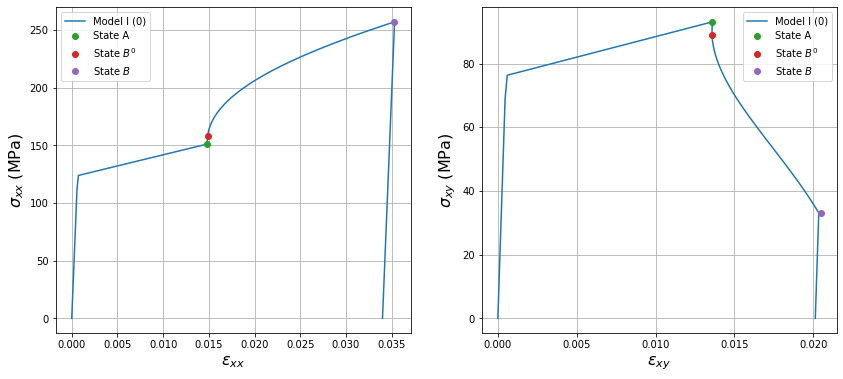

In [53]:
# Plot the data
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
plt.plot(np.array(data_1xx["EPXX_1"]), np.array(data_1xx["SIXX_0"]), 'C0-', label='Model I (0)')
plt.plot(eps_xx_A, sig_A, 'C2o', label='State A')
plt.plot(eps_xx_B0, sig_B0, 'C3o', label='State $B^0$')
plt.plot(eps_xx_B, sig_B, 'C4o', label='State $B$')
plt.xlabel('$\epsilon_{xx}$', fontsize=16)
plt.ylabel('$\sigma_{xx}$ (MPa)', fontsize=16)
plt.grid(True)
#ax.set_ylim([0, 20])
ax.legend(loc='best', fontsize=10)
ax = fig.add_subplot(122)
plt.plot(np.array(data_1xy["EPXY_1"]), np.array(data_1xy["SIXY_0"]), 'C0-', label='Model I (0)')
plt.plot(eps_xy_A, tau_A, 'C2o', label='State A')
plt.plot(eps_xy_B0, tau_B0, 'C3o', label='State $B^0$')
plt.plot(eps_xy_B, tau_B, 'C4o', label='State $B$')
plt.xlabel('$\epsilon_{xy}$', fontsize=16)
plt.ylabel('$\sigma_{xy}$ (MPa)', fontsize=16)
plt.grid(True)
#ax.set_ylim([0, 20])
ax.legend(loc='best', fontsize=10)
#fig.savefig('ssnp15i_8_sigeps.svg')

In [54]:
# Stress-strain
total = 256
start = 9
end = 63
skipfooter = total-end
data_1xx = pd.read_csv("./ssnp15h.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)
data_1xx.columns = ['INST', 'SIXX_0', 'EPXX_1']

start = 73
end = 127
skipfooter = total-end
data_1xy = pd.read_csv("./ssnp15h.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)
data_1xy.columns = ['INST', 'SIXY_0', 'EPXY_1']

start = 137
end = 191
skipfooter = total-end
data_2xx = pd.read_csv("./ssnp15h.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)
data_2xx.columns = ['INST', 'SIXX_0', 'EPXX_1']

start = 201
end = 255
skipfooter = total-end
data_2xy = pd.read_csv("./ssnp15h.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)
data_2xy.columns = ['INST', 'SIXY_0', 'EPXY_1']


#print(data_1xx)
#print(data_1xy)

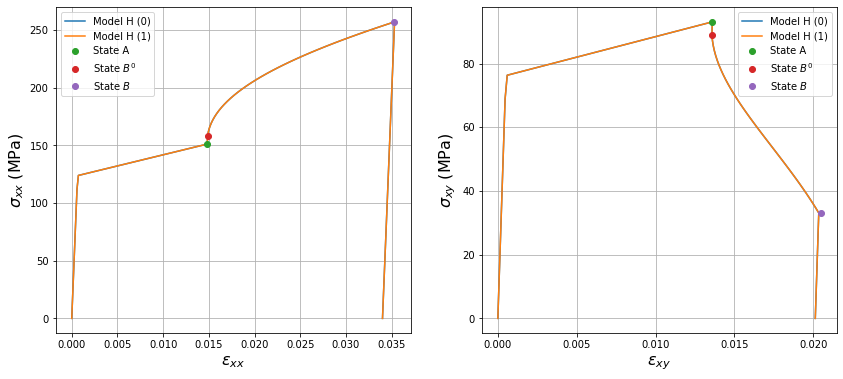

In [56]:
# Plot the data
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
plt.plot(np.array(data_1xx["EPXX_1"]), np.array(data_1xx["SIXX_0"]), 'C0-', label='Model H (0)')
plt.plot(np.array(data_2xx["EPXX_1"]), np.array(data_2xx["SIXX_0"]), 'C1-', label='Model H (1)')
plt.plot(eps_xx_A, sig_A, 'C2o', label='State A')
plt.plot(eps_xx_B0, sig_B0, 'C3o', label='State $B^0$')
plt.plot(eps_xx_B, sig_B, 'C4o', label='State $B$')
plt.xlabel('$\epsilon_{xx}$', fontsize=16)
plt.ylabel('$\sigma_{xx}$ (MPa)', fontsize=16)
plt.grid(True)
#ax.set_ylim([0, 20])
ax.legend(loc='best', fontsize=10)
ax = fig.add_subplot(122)
plt.plot(np.array(data_1xy["EPXY_1"]), np.array(data_1xy["SIXY_0"]), 'C0-', label='Model H (0)')
plt.plot(np.array(data_2xy["EPXY_1"]), np.array(data_2xy["SIXY_0"]), 'C1-', label='Model H (1)')
plt.plot(eps_xy_A, tau_A, 'C2o', label='State A')
plt.plot(eps_xy_B0, tau_B0, 'C3o', label='State $B^0$')
plt.plot(eps_xy_B, tau_B, 'C4o', label='State $B$')
plt.xlabel('$\epsilon_{xy}$', fontsize=16)
plt.ylabel('$\sigma_{xy}$ (MPa)', fontsize=16)
plt.grid(True)
#ax.set_ylim([0, 20])
ax.legend(loc='best', fontsize=10)
#fig.savefig('ssnp15h_8_sigeps.svg')

In [57]:
# Stress-strain
total = 337
start = 116
end = 148
skipfooter = total-end
data_1xx = pd.read_csv("./ssnp15g.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)
data_1xx.columns = ['INST', 'SIXX_0', 'EPXX_1']

start = 158
end = 190
skipfooter = total-end
data_1xy = pd.read_csv("./ssnp15g.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)
data_1xy.columns = ['INST', 'SIXY_0', 'EPXY_1']

start = 200
end = 263
skipfooter = total-end
data_2xx = pd.read_csv("./ssnp15g.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)
data_2xx.columns = ['INST', 'SIXX_0', 'EPXX_1']

start = 273
end = 336
skipfooter = total-end
data_2xy = pd.read_csv("./ssnp15g.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)
data_2xy.columns = ['INST', 'SIXY_0', 'EPXY_1']


#print(data_1xx)
#print(data_1xy)

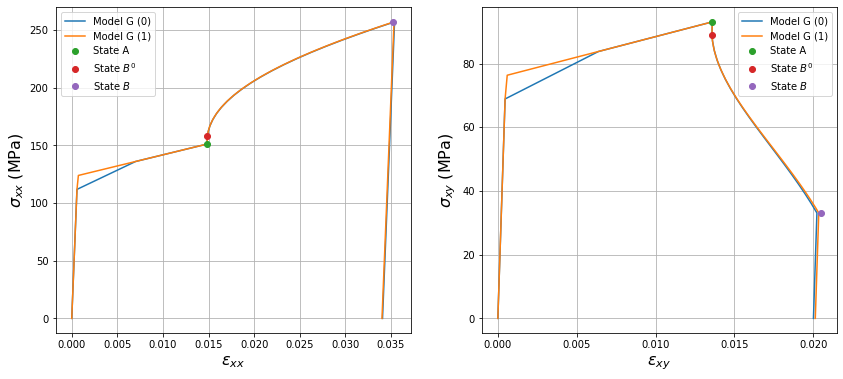

In [59]:
# Plot the data
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
plt.plot(np.array(data_1xx["EPXX_1"]), np.array(data_1xx["SIXX_0"]), 'C0-', label='Model G (0)')
plt.plot(np.array(data_2xx["EPXX_1"]), np.array(data_2xx["SIXX_0"]), 'C1-', label='Model G (1)')
plt.plot(eps_xx_A, sig_A, 'C2o', label='State A')
plt.plot(eps_xx_B0, sig_B0, 'C3o', label='State $B^0$')
plt.plot(eps_xx_B, sig_B, 'C4o', label='State $B$')
plt.xlabel('$\epsilon_{xx}$', fontsize=16)
plt.ylabel('$\sigma_{xx}$ (MPa)', fontsize=16)
plt.grid(True)
#ax.set_ylim([0, 20])
ax.legend(loc='best', fontsize=10)
ax = fig.add_subplot(122)
plt.plot(np.array(data_1xy["EPXY_1"]), np.array(data_1xy["SIXY_0"]), 'C0-', label='Model G (0)')
plt.plot(np.array(data_2xy["EPXY_1"]), np.array(data_2xy["SIXY_0"]), 'C1-', label='Model G (1)')
plt.plot(eps_xy_A, tau_A, 'C2o', label='State A')
plt.plot(eps_xy_B0, tau_B0, 'C3o', label='State $B^0$')
plt.plot(eps_xy_B, tau_B, 'C4o', label='State $B$')
plt.xlabel('$\epsilon_{xy}$', fontsize=16)
plt.ylabel('$\sigma_{xy}$ (MPa)', fontsize=16)
plt.grid(True)
#ax.set_ylim([0, 20])
ax.legend(loc='best', fontsize=10)
#fig.savefig('ssnp15g_8_sigeps.svg')

In [60]:
# Stress-strain
total = 562
start = 9
end = 108
skipfooter = total-end
data_1xx = pd.read_csv("./ssnp15f.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)
data_1xx.columns = ['INST', 'SIXX_0', 'EPXX_1']

start = 118
end = 217
skipfooter = total-end
data_1xy = pd.read_csv("./ssnp15f.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)
data_1xy.columns = ['INST', 'SIXY_0', 'EPXY_1']

start = 227
end = 277
skipfooter = total-end
data_2xx = pd.read_csv("./ssnp15f.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)
data_2xx.columns = ['INST', 'SIXX_0', 'EPXX_1']

start = 287
end = 337
skipfooter = total-end
data_2xy = pd.read_csv("./ssnp15f.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)
data_2xy.columns = ['INST', 'SIXY_0', 'EPXY_1']

start = 347
end = 394
skipfooter = total-end
data_3xx = pd.read_csv("./ssnp15f.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)
data_3xx.columns = ['INST', 'SIXX_0', 'EPXX_1']

start = 404
end = 451
skipfooter = total-end
data_3xy = pd.read_csv("./ssnp15f.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)
data_3xy.columns = ['INST', 'SIXY_0', 'EPXY_1']

start = 463
end = 561
skipfooter = total-end
data_rad = pd.read_csv("./ssnp15f.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)
data_rad.columns = ['INST', 'X_0', 'X_1', 'X_2']
#print(data_1xx)
#print(data_1xy)

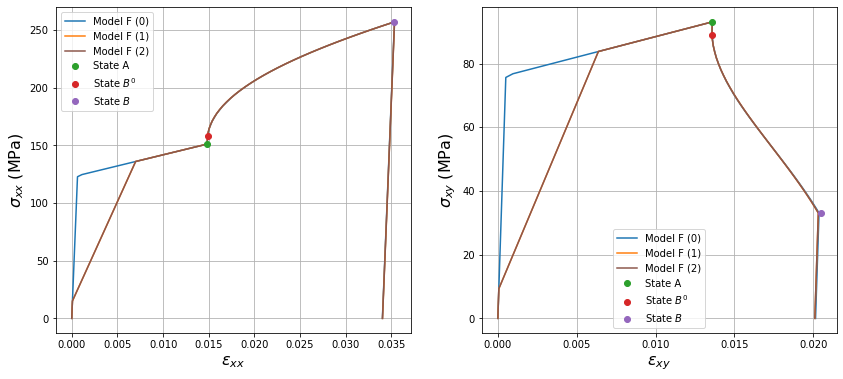

In [62]:
# Plot the data
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
plt.plot(np.array(data_1xx["EPXX_1"]), np.array(data_1xx["SIXX_0"]), 'C0-', label='Model F (0)')
plt.plot(np.array(data_2xx["EPXX_1"]), np.array(data_2xx["SIXX_0"]), 'C1-', label='Model F (1)')
plt.plot(np.array(data_3xx["EPXX_1"]), np.array(data_3xx["SIXX_0"]), 'C5-', label='Model F (2)')
plt.plot(eps_xx_A, sig_A, 'C2o', label='State A')
plt.plot(eps_xx_B0, sig_B0, 'C3o', label='State $B^0$')
plt.plot(eps_xx_B, sig_B, 'C4o', label='State $B$')
plt.xlabel('$\epsilon_{xx}$', fontsize=16)
plt.ylabel('$\sigma_{xx}$ (MPa)', fontsize=16)
plt.grid(True)
#ax.set_ylim([0, 20])
ax.legend(loc='best', fontsize=10)
ax = fig.add_subplot(122)
plt.plot(np.array(data_1xy["EPXY_1"]), np.array(data_1xy["SIXY_0"]), 'C0-', label='Model F (0)')
plt.plot(np.array(data_2xy["EPXY_1"]), np.array(data_2xy["SIXY_0"]), 'C1-', label='Model F (1)')
plt.plot(np.array(data_3xy["EPXY_1"]), np.array(data_3xy["SIXY_0"]), 'C5-', label='Model F (2)')
plt.plot(eps_xy_A, tau_A, 'C2o', label='State A')
plt.plot(eps_xy_B0, tau_B0, 'C3o', label='State $B^0$')
plt.plot(eps_xy_B, tau_B, 'C4o', label='State $B$')
plt.xlabel('$\epsilon_{xy}$', fontsize=16)
plt.ylabel('$\sigma_{xy}$ (MPa)', fontsize=16)
plt.grid(True)
#ax.set_ylim([0, 20])
ax.legend(loc='best', fontsize=10)
#fig.savefig('ssnp15f_8_sigeps.svg')

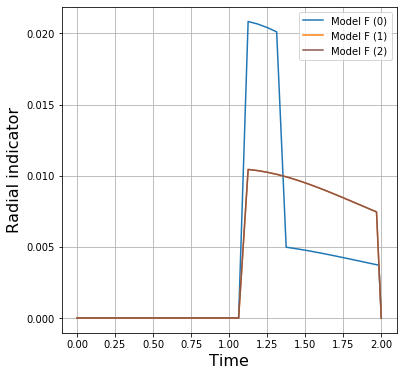

In [65]:
# Plot the data
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plt.plot(np.array(data_rad["INST"]), np.array(data_rad["X_0"]), 'C0-', label='Model F (0)')
plt.plot(np.array(data_rad["INST"]), np.array(data_rad["X_1"]), 'C1-', label='Model F (1)')
plt.plot(np.array(data_rad["INST"]), np.array(data_rad["X_2"]), 'C5-', label='Model F (2)')
plt.xlabel('Time', fontsize=16)
plt.ylabel('Radial indicator', fontsize=16)
plt.grid(True)
#ax.set_ylim([0, 20])
ax.legend(loc='best', fontsize=10)
#fig.savefig('ssnp15f_8_radial.svg')

In [67]:
# Stress-strain
total = 28
start = 9
end = 13
skipfooter = total-end
data_1xx = pd.read_csv("./ssnp15e.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)
data_1xx.columns = ['INST', 'SIXX_0', 'EPXX_1']

start = 23
end = 27
skipfooter = total-end
data_1xy = pd.read_csv("./ssnp15e.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)
data_1xy.columns = ['INST', 'SIXY_0', 'EPXY_1']

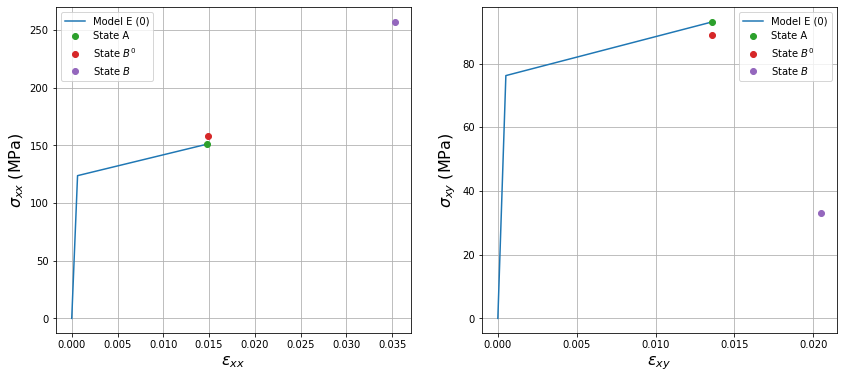

In [68]:
# Plot the data
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
plt.plot(np.array(data_1xx["EPXX_1"]), np.array(data_1xx["SIXX_0"]), 'C0-', label='Model E (0)')
plt.plot(eps_xx_A, sig_A, 'C2o', label='State A')
plt.plot(eps_xx_B0, sig_B0, 'C3o', label='State $B^0$')
plt.plot(eps_xx_B, sig_B, 'C4o', label='State $B$')
plt.xlabel('$\epsilon_{xx}$', fontsize=16)
plt.ylabel('$\sigma_{xx}$ (MPa)', fontsize=16)
plt.grid(True)
#ax.set_ylim([0, 20])
ax.legend(loc='best', fontsize=10)
ax = fig.add_subplot(122)
plt.plot(np.array(data_1xy["EPXY_1"]), np.array(data_1xy["SIXY_0"]), 'C0-', label='Model E (0)')
plt.plot(eps_xy_A, tau_A, 'C2o', label='State A')
plt.plot(eps_xy_B0, tau_B0, 'C3o', label='State $B^0$')
plt.plot(eps_xy_B, tau_B, 'C4o', label='State $B$')
plt.xlabel('$\epsilon_{xy}$', fontsize=16)
plt.ylabel('$\sigma_{xy}$ (MPa)', fontsize=16)
plt.grid(True)
#ax.set_ylim([0, 20])
ax.legend(loc='best', fontsize=10)
#fig.savefig('ssnp15e_8_sigeps.svg')

In [70]:
# Stress-strain
total = 32
start = 17
end = 19
skipfooter = total-end
data_1xx = pd.read_csv("./ssnp15d.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)
data_1xx.columns = ['INST', 'SIXX_0', 'EPXX_1']

start = 29
end = 31
skipfooter = total-end
data_1xy = pd.read_csv("./ssnp15d.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)
data_1xy.columns = ['INST', 'SIXY_0', 'EPXY_1']

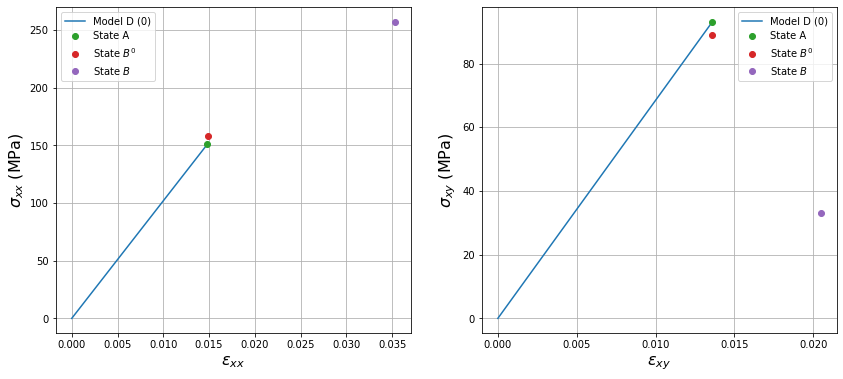

In [71]:
# Plot the data
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
plt.plot(np.array(data_1xx["EPXX_1"]), np.array(data_1xx["SIXX_0"]), 'C0-', label='Model D (0)')
plt.plot(eps_xx_A, sig_A, 'C2o', label='State A')
plt.plot(eps_xx_B0, sig_B0, 'C3o', label='State $B^0$')
plt.plot(eps_xx_B, sig_B, 'C4o', label='State $B$')
plt.xlabel('$\epsilon_{xx}$', fontsize=16)
plt.ylabel('$\sigma_{xx}$ (MPa)', fontsize=16)
plt.grid(True)
#ax.set_ylim([0, 20])
ax.legend(loc='best', fontsize=10)
ax = fig.add_subplot(122)
plt.plot(np.array(data_1xy["EPXY_1"]), np.array(data_1xy["SIXY_0"]), 'C0-', label='Model D (0)')
plt.plot(eps_xy_A, tau_A, 'C2o', label='State A')
plt.plot(eps_xy_B0, tau_B0, 'C3o', label='State $B^0$')
plt.plot(eps_xy_B, tau_B, 'C4o', label='State $B$')
plt.xlabel('$\epsilon_{xy}$', fontsize=16)
plt.ylabel('$\sigma_{xy}$ (MPa)', fontsize=16)
plt.grid(True)
#ax.set_ylim([0, 20])
ax.legend(loc='best', fontsize=10)
#fig.savefig('ssnp15d_8_sigeps.svg')

In [73]:
# Stress-strain
total = 26
start = 9
end = 12
skipfooter = total-end
data_1xx = pd.read_csv("./ssnp15c.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)
data_1xx.columns = ['INST', 'SIXX_0', 'EPXX_1']

start = 22
end = 25
skipfooter = total-end
data_1xy = pd.read_csv("./ssnp15c.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)
data_1xy.columns = ['INST', 'SIXY_0', 'EPXY_1']

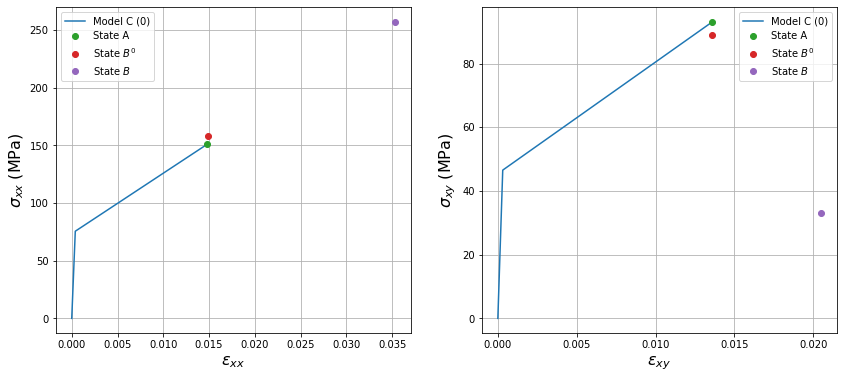

In [74]:
# Plot the data
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
plt.plot(np.array(data_1xx["EPXX_1"]), np.array(data_1xx["SIXX_0"]), 'C0-', label='Model C (0)')
plt.plot(eps_xx_A, sig_A, 'C2o', label='State A')
plt.plot(eps_xx_B0, sig_B0, 'C3o', label='State $B^0$')
plt.plot(eps_xx_B, sig_B, 'C4o', label='State $B$')
plt.xlabel('$\epsilon_{xx}$', fontsize=16)
plt.ylabel('$\sigma_{xx}$ (MPa)', fontsize=16)
plt.grid(True)
#ax.set_ylim([0, 20])
ax.legend(loc='best', fontsize=10)
ax = fig.add_subplot(122)
plt.plot(np.array(data_1xy["EPXY_1"]), np.array(data_1xy["SIXY_0"]), 'C0-', label='Model C (0)')
plt.plot(eps_xy_A, tau_A, 'C2o', label='State A')
plt.plot(eps_xy_B0, tau_B0, 'C3o', label='State $B^0$')
plt.plot(eps_xy_B, tau_B, 'C4o', label='State $B$')
plt.xlabel('$\epsilon_{xy}$', fontsize=16)
plt.ylabel('$\sigma_{xy}$ (MPa)', fontsize=16)
plt.grid(True)
#ax.set_ylim([0, 20])
ax.legend(loc='best', fontsize=10)
#fig.savefig('ssnp15c_8_sigeps.svg')

In [76]:
# Total energy
total = 408
start = 12
end = 66
skipfooter = total-end
data_1en = pd.read_csv("./ssnp15b.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

start = 79
end = 133
skipfooter = total-end
data_2en = pd.read_csv("./ssnp15b.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

# Stress-strain
start = 161
end = 215
skipfooter = total-end
data_1xx = pd.read_csv("./ssnp15b.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

start = 225
end = 279
skipfooter = total-end
data_1xy = pd.read_csv("./ssnp15b.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

start = 289
end = 343
skipfooter = total-end
data_2xx = pd.read_csv("./ssnp15b.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

start = 353
end = 407
skipfooter = total-end
data_2xy = pd.read_csv("./ssnp15b.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

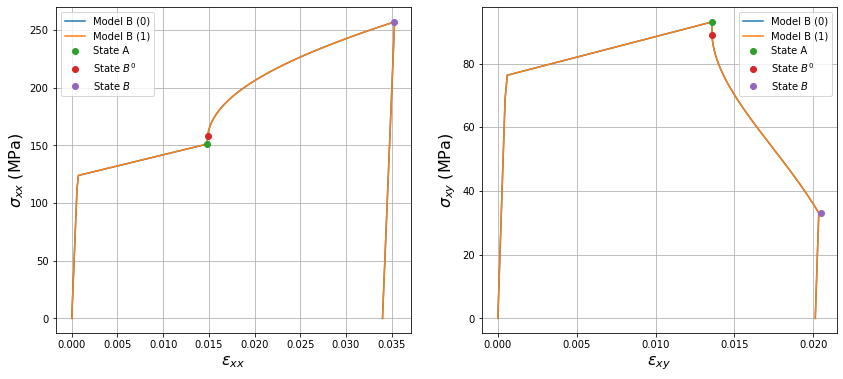

In [79]:
# Plot the data
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
plt.plot(np.array(data_1xx["EPXX_1"]), np.array(data_1xx["SIXX_0"]), 'C0-', label='Model B (0)')
plt.plot(np.array(data_2xx["EPXX_1"]), np.array(data_2xx["SIXX_0"]), 'C1-', label='Model B (1)')
plt.plot(eps_xx_A, sig_A, 'C2o', label='State A')
plt.plot(eps_xx_B0, sig_B0, 'C3o', label='State $B^0$')
plt.plot(eps_xx_B, sig_B, 'C4o', label='State $B$')
plt.xlabel('$\epsilon_{xx}$', fontsize=16)
plt.ylabel('$\sigma_{xx}$ (MPa)', fontsize=16)
plt.grid(True)
#ax.set_ylim([0, 20])
ax.legend(loc='best', fontsize=10)
ax = fig.add_subplot(122)
plt.plot(np.array(data_1xy["EPXY_1"]), np.array(data_1xy["SIXY_0"]), 'C0-', label='Model B (0)')
plt.plot(np.array(data_2xy["EPXY_1"]), np.array(data_2xy["SIXY_0"]), 'C1-', label='Model B (1)')
plt.plot(eps_xy_A, tau_A, 'C2o', label='State A')
plt.plot(eps_xy_B0, tau_B0, 'C3o', label='State $B^0$')
plt.plot(eps_xy_B, tau_B, 'C4o', label='State $B$')
plt.xlabel('$\epsilon_{xy}$', fontsize=16)
plt.ylabel('$\sigma_{xy}$ (MPa)', fontsize=16)
plt.grid(True)
#ax.set_ylim([0, 20])
ax.legend(loc='best', fontsize=10)
#fig.savefig('ssnp15b_8_sigeps.svg')

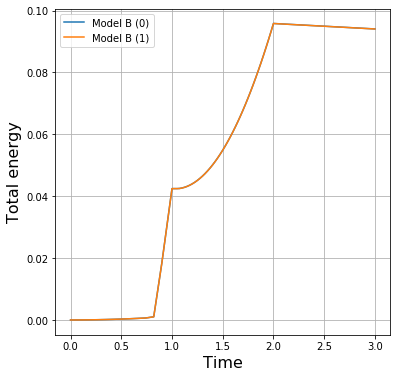

In [82]:
# Plot the data
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plt.plot(np.array(data_1en["INST"]), np.array(data_1en["TOTALE"]), 'C0-', label='Model B (0)')
plt.plot(np.array(data_2en["INST"]), np.array(data_2en["TOTALE"]), 'C1-', label='Model B (1)')
plt.xlabel('Time', fontsize=16)
plt.ylabel('Total energy', fontsize=16)
plt.grid(True)
#ax.set_ylim([0, 20])
ax.legend(loc='best', fontsize=10)
fig.savefig('ssnp15b_8_energy.svg')

In [85]:
# Stress-strain
total = 274
start = 27
end = 81
skipfooter = total-end
data_1xx = pd.read_csv("./ssnp15a.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

start = 91
end = 145
skipfooter = total-end
data_1xy = pd.read_csv("./ssnp15a.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

start = 155
end = 209
skipfooter = total-end
data_2xx = pd.read_csv("./ssnp15a.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

start = 219
end = 273
skipfooter = total-end
data_2xy = pd.read_csv("./ssnp15a.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

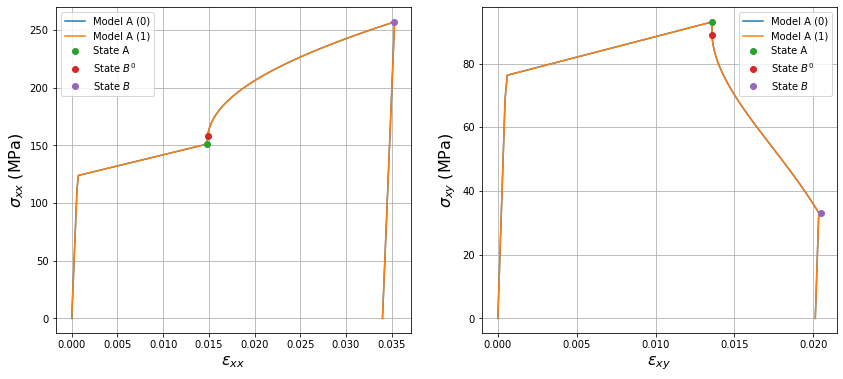

In [87]:
# Plot the data
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
plt.plot(np.array(data_1xx["EPXX_1"]), np.array(data_1xx["SIXX_0"]), 'C0-', label='Model A (0)')
plt.plot(np.array(data_2xx["EPXX_1"]), np.array(data_2xx["SIXX_0"]), 'C1-', label='Model A (1)')
plt.plot(eps_xx_A, sig_A, 'C2o', label='State A')
plt.plot(eps_xx_B0, sig_B0, 'C3o', label='State $B^0$')
plt.plot(eps_xx_B, sig_B, 'C4o', label='State $B$')
plt.xlabel('$\epsilon_{xx}$', fontsize=16)
plt.ylabel('$\sigma_{xx}$ (MPa)', fontsize=16)
plt.grid(True)
#ax.set_ylim([0, 20])
ax.legend(loc='best', fontsize=10)
ax = fig.add_subplot(122)
plt.plot(np.array(data_1xy["EPXY_1"]), np.array(data_1xy["SIXY_0"]), 'C0-', label='Model A (0)')
plt.plot(np.array(data_2xy["EPXY_1"]), np.array(data_2xy["SIXY_0"]), 'C1-', label='Model A (1)')
plt.plot(eps_xy_A, tau_A, 'C2o', label='State A')
plt.plot(eps_xy_B0, tau_B0, 'C3o', label='State $B^0$')
plt.plot(eps_xy_B, tau_B, 'C4o', label='State $B$')
plt.xlabel('$\epsilon_{xy}$', fontsize=16)
plt.ylabel('$\sigma_{xy}$ (MPa)', fontsize=16)
plt.grid(True)
#ax.set_ylim([0, 20])
ax.legend(loc='best', fontsize=10)
fig.savefig('ssnp15a_8_sigeps.svg')

In [88]:
def calcPQ(sig_data, tau_data):
    p = list(map(lambda x: x / 3.0, sig_data))
    q = list(map(lambda x, y: np.sqrt(x**2 + 3 * y**2), sig_data, tau_data))
    return p, q

In [90]:
p1, q1 = calcPQ(data_1xx["SIXX_0"], data_1xy["SIXY_0"])
p2, q2 = calcPQ(data_2xx["SIXX_0"], data_2xy["SIXY_0"])

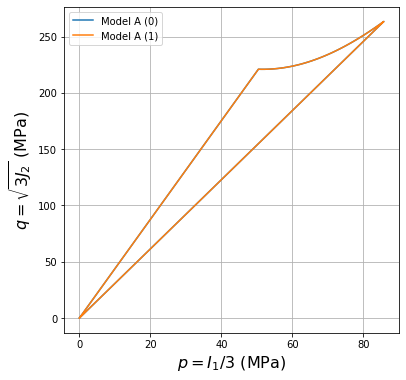

In [91]:
# Plot the data
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plt.plot(np.array(p1), np.array(q1), 'C0-', label='Model A (0)')
plt.plot(np.array(p2), np.array(q2), 'C1-', label='Model A (1)')
plt.xlabel('$p = I_1/3$ (MPa)', fontsize=16)
plt.ylabel('$q = \sqrt{3J_2}$ (MPa)', fontsize=16)
plt.grid(True)
#ax.set_ylim([0, 20])
ax.legend(loc='best', fontsize=10)
fig.savefig('ssnp15a_8_pq.svg')